In [1]:
from pseudorandom import pseudo_random
import seaborn as sns
import matplotlib.pyplot as plt

Om de random nummer generator te testen zijn er plots gemaakt en een Unittest geschreven. De plots laten geven een duidelijk beeld van de verdeling van de random nummers, hierbij is de verwachting dat de nummers gelijk verdeeld zullen zijn tussen 0 en 1.

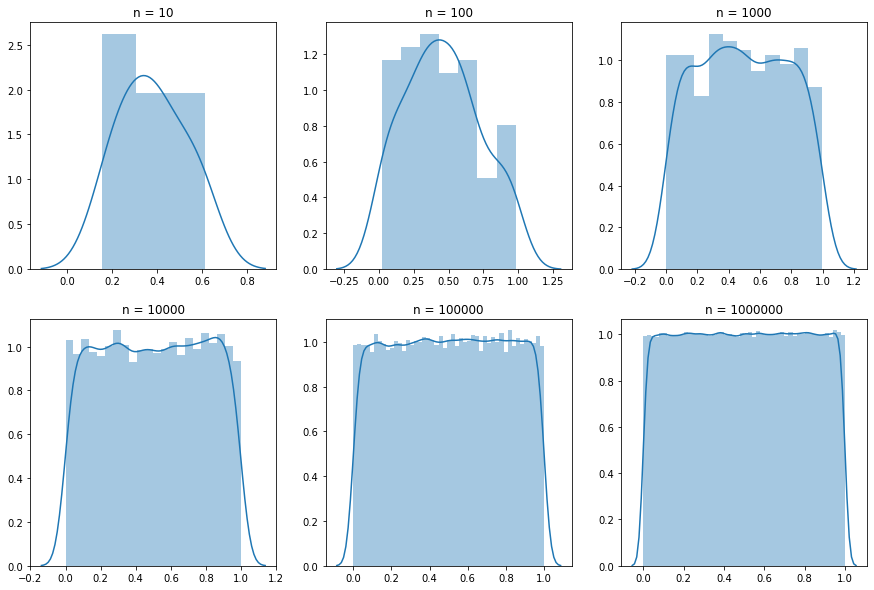

In [2]:
# Create plots showing distribution of numbers returned from function
cols = 3
fig, axes = plt.subplots(nrows=2, ncols=cols, figsize=(15,10))

nums = [10, 10**2, 10**3, 10**4, 10**5, 10**6]

count = 0
row = 0
for n in nums:
    x = pseudo_random(3455345, n=n)
    
    sns.distplot(x, ax=axes[row][count])
    
    axes[row][count].set_title(f"n = {n}")
    
    if count == cols-1:
        count = 0
        row = 1
    else:
        count+=1

Uit bovenstaande grafieken blijkt dat de verwachting klopt, en de random nummer generator dus goede nummers terug geeft. Vooral bij de n = 1.000.000 grafiek is goed te zien dat de verdeling gelijk is.

De Unit test zal letten op de volgende vijf punten:
- Zelfde waarden bij zelfde seed
- Andere waarden bij andere seed
- Even veel waarden als gevraagd
- Alle waarden tussen 0 en 1
- Alle waarden uniek (Hoeft in theorie niet; in praktijk wel, gezien het aantal getallen achter de komma.)

In [3]:
# Run unittest
import unittest

In [4]:
class TestRandom(unittest.TestCase):
    def test_pseudo_random(self):
        """
        Tests that the pseudo-random function:
        - Returns same values on same seed
        - Returns different values with different seed
        - Returns `n` elements when `n` elements are asked
        - Returns all values between 0 and 1
        - Returns all unique values
        """
        seed = 125235
        seed2 = 109249814
        
        n = 12

        x1 = pseudo_random(seed, n=n)
        x2 = pseudo_random(seed, n=n)
        x3 = pseudo_random(seed2, n=n)

        clauses = [
            x1 == x2,
            x1 != x3,
            len(x1) == n,
            all([0 < x < 1 for x in x1]),
            len(set(x1)) == len(x1) 
        ]

        for clause in clauses:
            self.assertTrue(clause)

In [5]:
unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.009s

OK


Uit de test blijkt dat aan deze vereisten voldaan wordt.